# **Setup**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline  
import seaborn as sns

# **Data Import**

In [5]:
!kaggle datasets download -d marc3987/ab-testing-dataset --unzip --path "./Input Data" 

''' 
AKIN9326: persuasive as focused on long term benefits of reading in one's professional life and how 
kindle will help with reading.

AKIN8012: persuasive ad focused on instilling fear in-peoples mind about about what will happen to professional 
career if they dont read regularly.
'''


  0%|          | 0.00/74.7k [00:00<?, ?B/s]
100%|██████████| 74.7k/74.7k [00:00<00:00, 644kB/s]
100%|██████████| 74.7k/74.7k [00:00<00:00, 638kB/s]


" \nAKIN9326: persuasive as focused on long term benefits of reading in one's professional life and how \nkindle will help with reading.\n\nAKIN8012: persuasive ad focused on instilling fear in-peoples mind about about what will happen to professional \ncareer if they dont read regularly.\n"

In [6]:
df = pd.read_excel('./Input Data/kindle AB testing dataset.xlsx')
df.rename(columns={'Total_Conversion': 'Total_Conv','Approved_Conversion':'Appr_Conv'}, inplace=True)

print(df.shape)
print(df.columns) 
df.head()

(1250, 10)
Index(['ad_id', 'campaign_id', 'age', 'gender', 'interest', 'Impressions',
       'Clicks', 'Spent', 'Total_Conv', 'Appr_Conv'],
      dtype='object')


,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conv,Appr_Conv
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.920000,5,1
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.049996,3,1
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.400000,3,0
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.000000,1,1
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.330001,3,2


# **Data Validation & Cleaning**

## **Info**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_id        1250 non-null   int64  
 1   campaign_id  1250 non-null   object 
 2   age          1250 non-null   object 
 3   gender       1250 non-null   object 
 4   interest     1250 non-null   object 
 5   Impressions  1250 non-null   int64  
 6   Clicks       1250 non-null   int64  
 7   Spent        1250 non-null   float64
 8   Total_Conv   1250 non-null   int64  
 9   Appr_Conv    1250 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 97.8+ KB


In [8]:
df['ad_id'] = df['ad_id'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_id        1250 non-null   object 
 1   campaign_id  1250 non-null   object 
 2   age          1250 non-null   object 
 3   gender       1250 non-null   object 
 4   interest     1250 non-null   object 
 5   Impressions  1250 non-null   int64  
 6   Clicks       1250 non-null   int64  
 7   Spent        1250 non-null   float64
 8   Total_Conv   1250 non-null   int64  
 9   Appr_Conv    1250 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 97.8+ KB


## **Drop Duplicates**

In [9]:
# Check Duplicates
df.duplicated().sum()

70

In [10]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
df.shape

(1180, 10)

In [11]:
df[df['ad_id'].duplicated()].sort_values(by='ad_id')

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conv,Appr_Conv
1239,1121095,AKIN8012,30-34,M,Business & industry,459690,50,86.330001,5,2
1198,1121111,AKIN8012,30-34,M,Business & industry,182452,20,35.730000,4,1
1220,1121115,AKIN8012,30-34,M,Business & industry,410310,55,96.800001,3,0
23,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.920000,2,1
1185,1121124,AKIN8012,30-34,M,Business & industry,128386,15,28.850000,2,1
...,...,...,...,...,...,...,...,...,...,...
1184,1314400,AKIN8012,40-44,F,Entertainment (Reading),250234,40,62.319999,4,1
1241,1314403,AKIN8012,45-49,F,Entertainment (Reading),168714,24,36.010001,2,2
1242,1314405,AKIN8012,45-49,F,Entertainment (Reading),558666,110,162.639997,14,5
1216,1314409,AKIN8012,45-49,F,Entertainment (Reading),212508,33,47.690000,4,1


## **Describe**

In [12]:
# Explore Numeric Data
print('Numeric Variables')
display(df.describe())

# Explore Categorical Data
print('Categorical Variables')
display(df.describe(include=['O']))

Numeric Variables


,Impressions,Clicks,Spent,Total_Conv,Appr_Conv
count,1.180000e+03,1180.000000,1180.000000,1180.000000,1180.000000
mean,2.029177e+05,36.212712,55.566610,2.288983,0.616102
std,3.261714e+05,59.716958,90.628289,3.073934,0.986376
min,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,8.008000e+03,1.000000,1.587500,1.000000,0.000000
50%,6.725200e+04,10.000000,16.180000,1.000000,0.000000
75%,2.506142e+05,42.000000,65.067500,2.000000,1.000000
max,3.052003e+06,421.000000,639.949998,38.000000,13.000000


Categorical Variables


,ad_id,campaign_id,age,gender,interest
count,1180,1180,1180,1180,1180
unique,1110,2,4,2,3
top,1121121,AKIN9326,30-34,M,Business & industry
freq,2,626,436,612,964


## **Categorical Data**

In [13]:
# Categorical Data Analysis
for i in df.select_dtypes(include='O').columns.to_list():
    print(i,':',df[i].nunique(),df[i].unique())

ad_id : 1110 [1121121 1121091 1121092 ... 709038 710682 709761]
campaign_id : 2 ['AKIN9326' 'AKIN8012']
age : 4 ['30-34' '35-39' '40-44' '45-49']
gender : 2 ['M' 'F']
interest : 3 ['Business & industry' 'Entertainment (Games)' 'Entertainment (Reading)']


# **Data Exploration**

## **NUM Data Distribution**

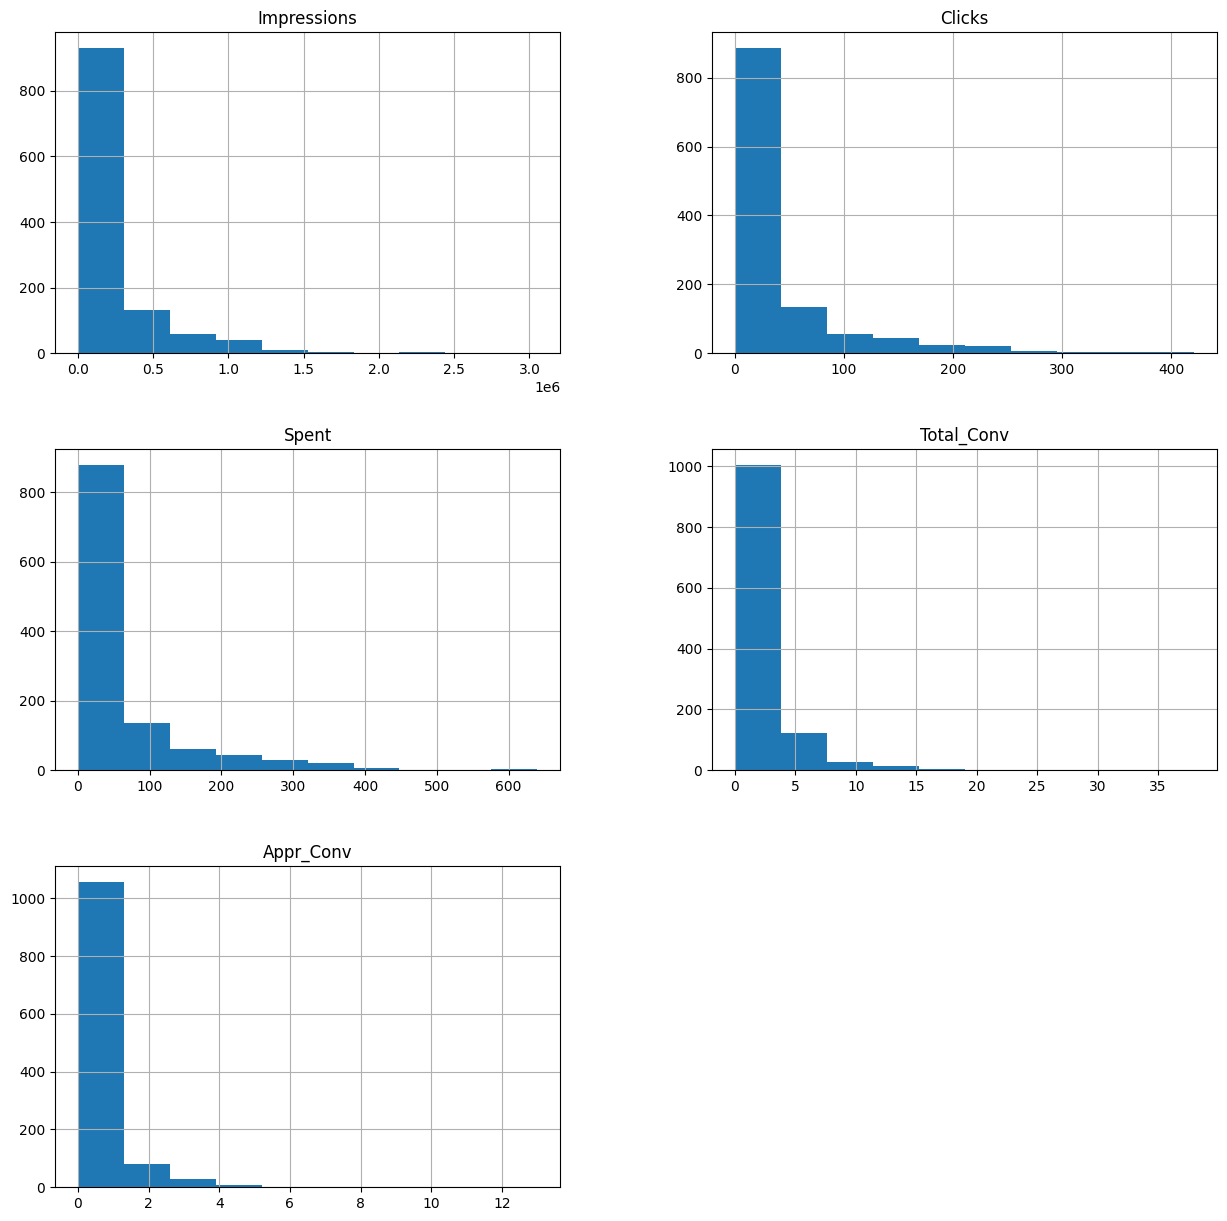

In [14]:
# Numeric Data
df.drop(columns=['ad_id']).hist(figsize=(15,15))
plt.show()

## **CAT Data Distribution**

In [15]:
# Frequency Distribution Of Categorical Variables 
for i in df.select_dtypes(include='O').columns.to_list():
    print(df[i].value_counts())
    print('\n')

ad_id
1121121    2
1121620    2
1122260    2
1121429    2
1121264    2
          ..
1121928    1
1121931    1
1121933    1
1121935    1
709761     1
Name: count, Length: 1110, dtype: int64


campaign_id
AKIN9326    626
AKIN8012    554
Name: count, dtype: int64


age
30-34    436
45-49    272
35-39    251
40-44    221
Name: count, dtype: int64


gender
M    612
F    568
Name: count, dtype: int64


interest
Business & industry        964
Entertainment (Games)      124
Entertainment (Reading)     92
Name: count, dtype: int64




In [16]:
print(5//2)
print(5%2)

2
1


['ad_id', 'campaign_id', 'age', 'gender', 'interest']


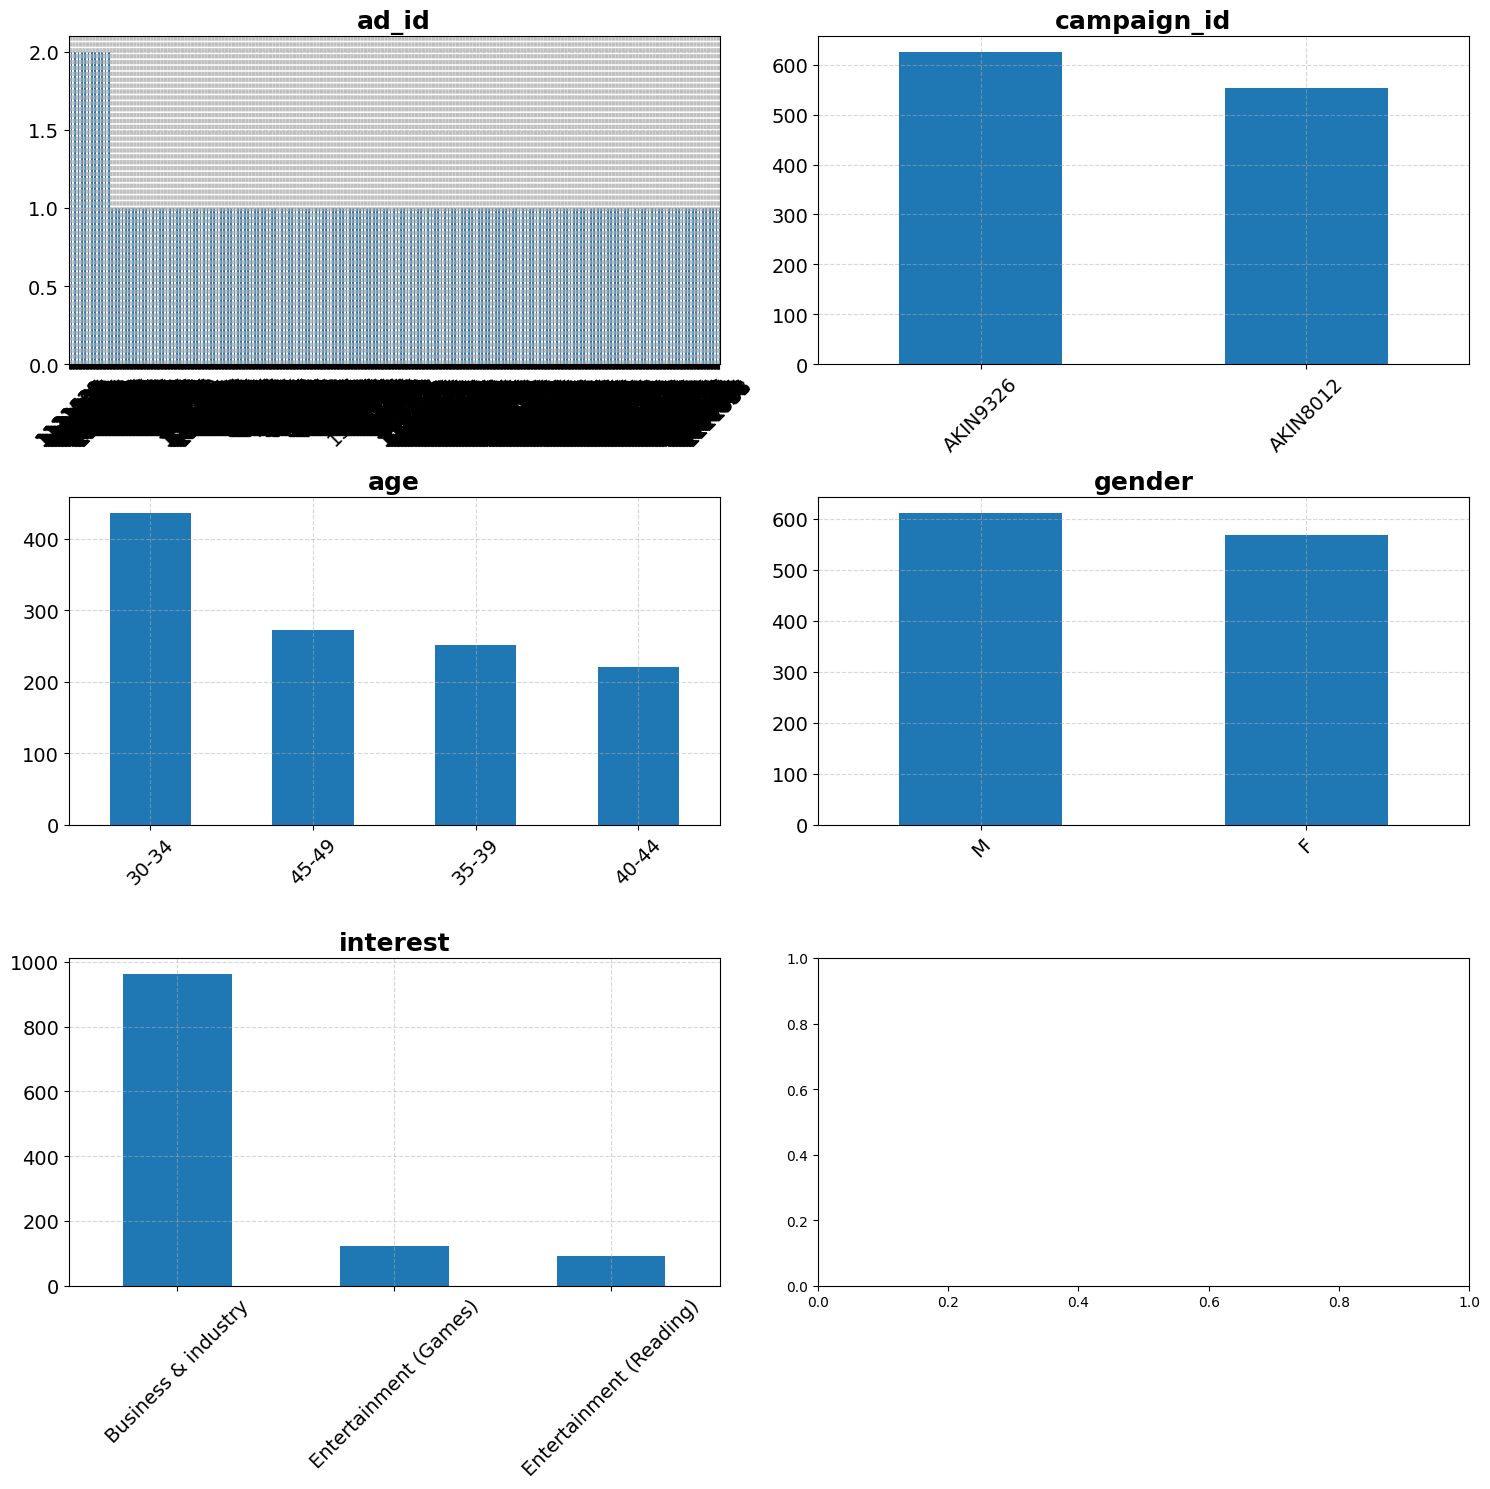

In [17]:
df_cat_cols_list = df.select_dtypes(include=['object']).columns.to_list()
print(df_cat_cols_list)

# Plotting the categorical columns
ncolumns = 2
nrows = len(df_cat_cols_list)//ncolumns + len(df_cat_cols_list)%ncolumns

fig, axes = plt.subplots(ncols=ncolumns,nrows=nrows,figsize=(15,15))

for i, col in enumerate(df.select_dtypes(include=['object']).columns.to_list()):
    ax = axes[i//ncolumns, i%ncolumns]
    df[col].value_counts().plot(kind='bar',ax=ax)
    ax.set_title(col,fontsize=18,fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

## **Campaign Group Analysis**

In [18]:
df.head()

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conv,Appr_Conv
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.920000,5,1
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.049996,3,1
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.400000,3,0
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.000000,1,1
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.330001,3,2


In [19]:
df.drop(columns='ad_id').groupby(by='campaign_id').aggregate('mean','avg').reset_index()

,campaign_id,Impressions,Clicks,Spent,Total_Conv,Appr_Conv
0,AKIN8012,61904.722022,11.944043,17.739224,1.608303,0.523466
1,AKIN9326,327711.845048,57.690096,89.043243,2.891374,0.698083


In [20]:
df.groupby(by='campaign_id').agg({'ad_id':'count','Clicks':['mean','sum']})

ad_id     Clicks       
            count       mean    sum
campaign_id                        
AKIN8012      554  11.944043   6617
AKIN9326      626  57.690096  36114

# **Data Analysis**

## **Chi-Square Test**

Tests if there's a statistically significant relationship between two categorical variables.

In [21]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index= df['campaign_id'], columns='count')
display(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("-------------------------------------------")
print('\n')

# Hypotheis Definition
# H0: There is statistically significant difference between categories in campaign_id
# H1: There is no statistically significant difference between categories in campaign_id

# Set the significance level
alpha = 0.05

# Hypothesis Testing
if p <= alpha:
    print("Reject the null hypothesis")
    print("There is a statistically significant difference between categories in campaign_id")
else:
    print("Fail to reject the null hypothesis")
    print("There is no statistically significant difference between categories in campaign_id") 

col_0,count
campaign_id,
AKIN8012,554
AKIN9326,626


Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Expected frequencies: [[554.]
 [626.]]
-------------------------------------------


Fail to reject the null hypothesis
There is no statistically significant difference between categories in campaign_id


## **Feature Engineering**

In [22]:
# Click Through Rate 
df['CTR'] = df['Clicks']/df['Impressions']
df.head()

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conv,Appr_Conv,CTR
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.920000,5,1,0.000142
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.049996,3,1,0.000118
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.400000,3,0,0.000105
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.000000,1,1,0.000000
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.330001,3,2,0.000109


# **References**

- https://www.kaggle.com/datasets/marc3987/ab-testing-dataset 
- https://www.youtube.com/watch?v=gYOrbAn1ADk 